# Relação entre gastos de campanha e votos nas eleições para vereador no município de São Paulo
<hr style='border: 2px solid black;'>

Esta pesquisa tem como objetivo verificar a relação entre os gastos de campanha e o número de votos obtidos para a eleição de vereadores no município de São Paulo em 2020

## Dados Obtidos
Fonte: Repositório de Dados Eleitorais do Tribunal Superior Eleitoral
<br>
Link: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

1. Despesas de Gastos Contratados por Candidato no estado de SP
2. Votação de Candadidatos por Município e Zona do estado de SP

### Importando Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Selecionando a formatação dos gráficos
sns.set_palette('deep')
sns.set_style('darkgrid')

# <font color='black' style='font-size: 26px;'>Etapa 1: Conhecendo os dados de gastos</font>
<hr style='border: 2px solid black;'>

### Importando os dados de gastos

In [2]:
gastos = pd.read_csv('despesas_contratadas_candidatos_2020_SP.csv', delimiter=';')

### Verificando informações gerais

In [3]:
#Olhando como é o dataframe
gastos.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,SG_PARTIDO_FORNECEDOR,NM_PARTIDO_FORNECEDOR,DS_TIPO_DOCUMENTO,NR_DOCUMENTO,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,SQ_DESPESA,DT_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,27/01/2021,14:19:45,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,#NULO#,#NULO#,20210000,"Encargos financeiros, taxas bancárias e/ou op....",37155421,13/11/2020,TAXA DE DOC,10.45
1,27/01/2021,14:19:45,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,#NULO#,#NULO#,20210000,"Encargos financeiros, taxas bancárias e/ou op....",39573736,04/11/2020,TARIFA DOC/TED,10.45
2,27/01/2021,14:19:45,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,#NULO#,#NULO#,20210000,"Encargos financeiros, taxas bancárias e/ou op....",38430319,30/11/2020,TARIFA DOC/TED,10.45
3,27/01/2021,14:19:45,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,2,Final,...,#NULO#,#NULO#,Outro,8232507001,20210000,"Encargos financeiros, taxas bancárias e/ou op....",39198601,13/12/2020,TARIFA TRANSFERENCIA RECURSO,1.20
4,27/01/2021,14:19:45,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,2,Final,...,#NULO#,#NULO#,Outro,8531811000,20210000,"Encargos financeiros, taxas bancárias e/ou op....",39198816,13/12/2020,TARIFA TED-DOC,10.45


In [4]:
#Verificando o tipo das variáveis
gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554314 entries, 0 to 554313
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DT_GERACAO                 554314 non-null  object 
 1   HH_GERACAO                 554314 non-null  object 
 2   ANO_ELEICAO                554314 non-null  int64  
 3   CD_TIPO_ELEICAO            554314 non-null  int64  
 4   NM_TIPO_ELEICAO            554314 non-null  object 
 5   CD_ELEICAO                 554314 non-null  int64  
 6   DS_ELEICAO                 554314 non-null  object 
 7   DT_ELEICAO                 554314 non-null  object 
 8   ST_TURNO                   554314 non-null  int64  
 9   TP_PRESTACAO_CONTAS        554314 non-null  object 
 10  DT_PRESTACAO_CONTAS        554314 non-null  object 
 11  SQ_PRESTADOR_CONTAS        554314 non-null  int64  
 12  SG_UF                      554314 non-null  object 
 13  SG_UE                      55

### Filtrando as colunas de interesse:

NM_UE:Nome do Município
<br>
DS_CARGO: Descrição do Cargo
<br>
NM_CANDIDATO: Nome do Candidato
<br>
SG_PARTIDO: Sigla do Partido
<br>
DS_ORIGEM_DESPESA: Descrição da Despesa
<br>
VR_DESPESA_CONTRATADA: Valor da Despesa

In [5]:
#Selecionando as colunas desejadas
dados = gastos[['NM_UE','DS_CARGO','NM_CANDIDATO','SG_PARTIDO','DS_ORIGEM_DESPESA','VR_DESPESA_CONTRATADA']]

In [6]:
#Verificando o novo dataframe
dados.head()

,NM_UE,DS_CARGO,NM_CANDIDATO,SG_PARTIDO,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
0,SANTO ANDRÉ,Vereador,ANTENOR PEREIRA DE BARROS FILHO,PATRIOTA,"Encargos financeiros, taxas bancárias e/ou op....",10.45
1,FRANCA,Prefeito,ADÉRMIS MARINI JÚNIOR,PSDB,"Encargos financeiros, taxas bancárias e/ou op....",10.45
2,DRACENA,Prefeito,ANDRE KOZAN LEMOS,PATRIOTA,"Encargos financeiros, taxas bancárias e/ou op....",10.45
3,SÃO VICENTE,Prefeito,SOLANGE CRISTINA DE FREITAS,PSDB,"Encargos financeiros, taxas bancárias e/ou op....",1.20
4,SÃO VICENTE,Prefeito,SOLANGE CRISTINA DE FREITAS,PSDB,"Encargos financeiros, taxas bancárias e/ou op....",10.45


### Filtrando por São Paulo e por Vereador

In [7]:
#Filtrando as colunas de município e cargo por São Paulo e Vereador
dados = dados[(dados.NM_UE =='SÃO PAULO') & (dados.DS_CARGO =='Vereador')]

#Adicionando novo index
dados = dados.reset_index()

#Excluindo o index antigo, nome de município e tipo de cargo
dados = dados.drop(['index','NM_UE','DS_CARGO'],axis=1)

In [8]:
#Verificando a tabela filtrada
dados.head()

,NM_CANDIDATO,SG_PARTIDO,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
0,ADRIANO DA COSTA E SILVA,PTB,Diversas a especificar,75000.00
1,PATRICIA RODRIGUES DA SILVA,PT,"Encargos financeiros, taxas bancárias e/ou op....",10.45
2,ANDREA CRISTINA RIBEIRO DOS SANTOS,DEM,"Encargos financeiros, taxas bancárias e/ou op....",10.45
3,SANDRO PINTO DE TOLEDO,DEM,"Encargos financeiros, taxas bancárias e/ou op....",10.45
4,ROGÉRIO GUEIROS DE ARAÚJO,PROS,"Encargos financeiros, taxas bancárias e/ou op....",49.00


### Se familizarizando com os dados

In [9]:
print('Número de candidatos a vereador em São Paulo: {}'.format(dados.NM_CANDIDATO.nunique()))

Número de candidatos a vereador em São Paulo: 1331


In [10]:
print('Número de partidos que lançaram candidatos a vereador: {}'.format(dados.SG_PARTIDO.nunique()))

Número de partidos que lançaram candidatos a vereador: 32


In [11]:
print('Tipos de Origem de Despesa: {}'.format(dados.DS_ORIGEM_DESPESA.nunique()))

Tipos de Origem de Despesa: 39


### Primeiras Visualizações

#### Histograma do valor dos gastos em campanha

C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Gastos em Despesas de Campanha (R$)', ylabel='Densidade'>

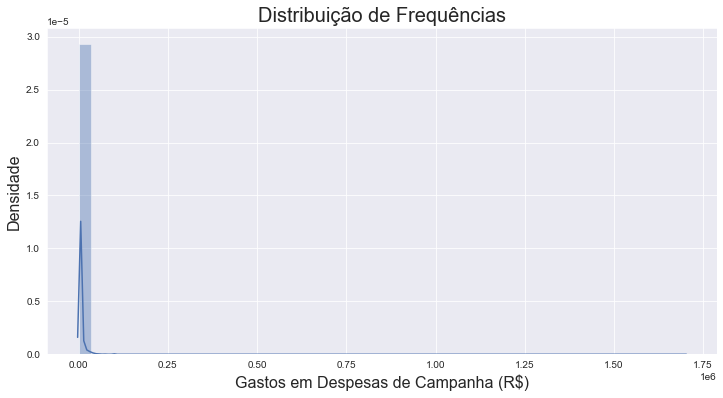

In [12]:
ax = sns.distplot(dados['VR_DESPESA_CONTRATADA'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Gastos em Despesas de Campanha (R$)', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax

Resultado: A maior parte dos gastos de campanhas são em valores pequenos, a mediana é do valor de R$ 600,00 enquanto o maior valor é de 1,7 milhão de reais, assim a distribuição dos gastos é altamente assimétrico à direita.

#### Gráfico de Barras dos Tipos de Despesas

<AxesSubplot:title={'center':'Quantidade de Despesas de Campanha'}, xlabel='Categoria de Despesa', ylabel='Número de Despesas'>

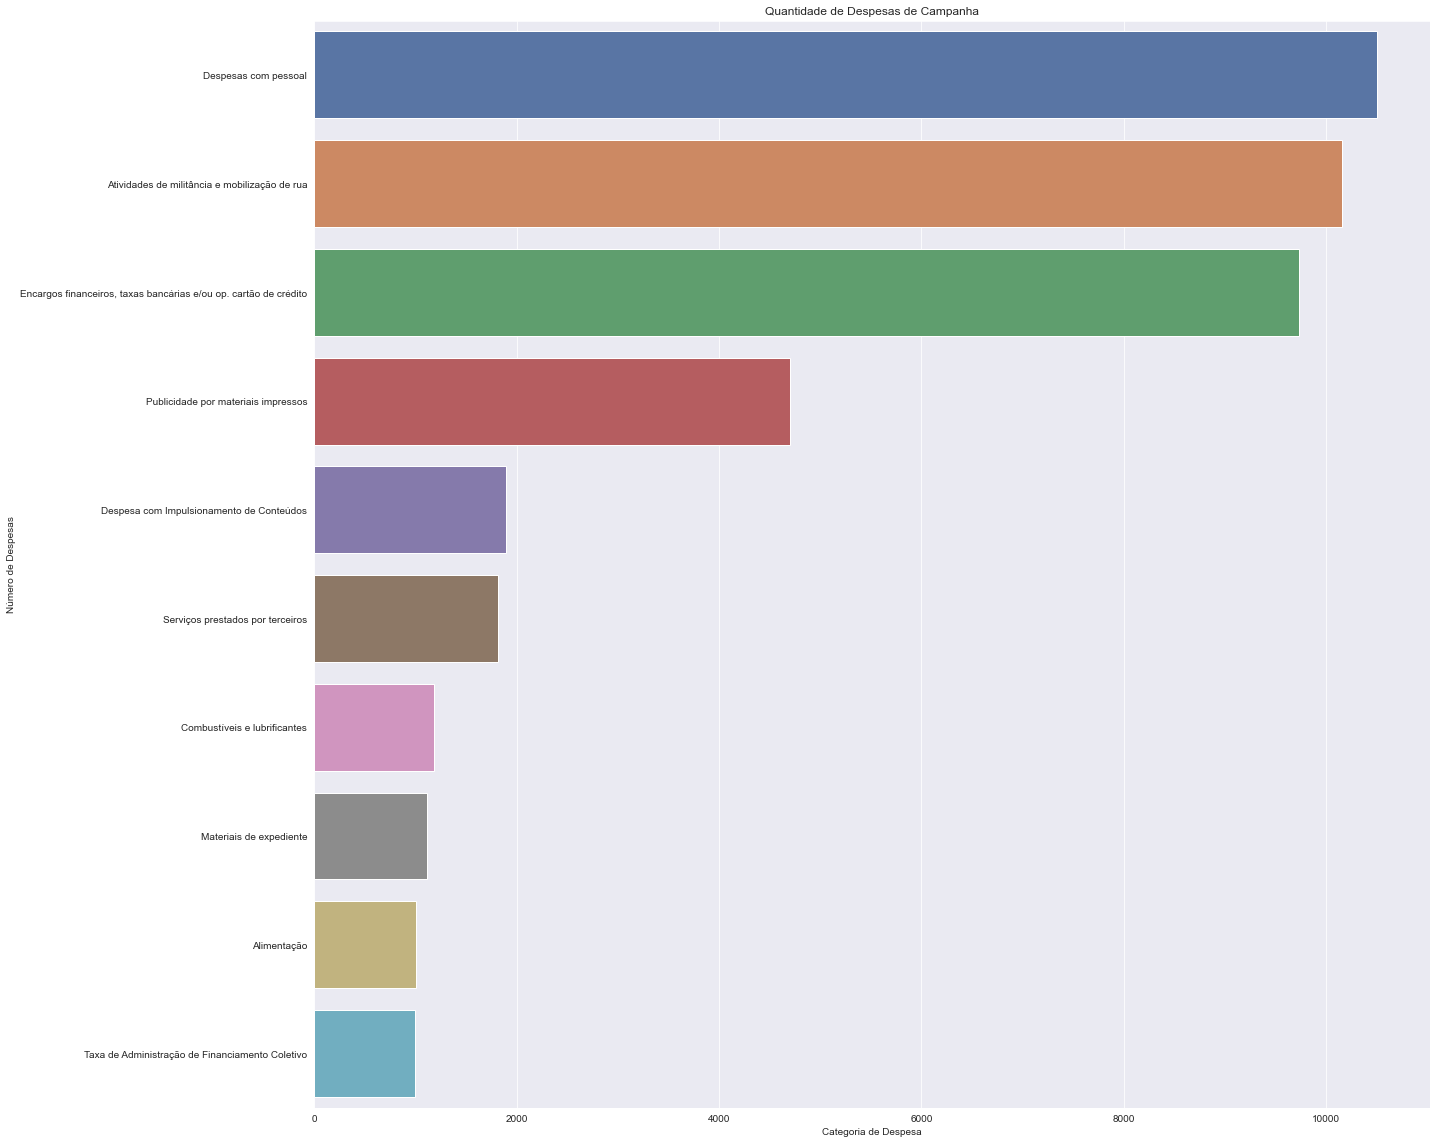

In [13]:
despesas = dados.DS_ORIGEM_DESPESA.value_counts()
despesas = despesas.reset_index()
despesas.head(10)
plt.figure(figsize=(20,20))
ax = sns.barplot(data=despesas.head(10),y='index',x='DS_ORIGEM_DESPESA',)
plt.title('Quantidade de Despesas de Campanha')
plt.xlabel('Categoria de Despesa')
plt.ylabel('Número de Despesas')
ax


Resultado: Os 10 maiores tipos de gastos abarcam cerca de 89% das ações de gastos (não o montante de recursos, mas quantas vezes cada tipo aparece, entre eles se destacam as despesas com pessoal, com militância, encargos financeiros, publicidade impresa, e despesas de impulsionamento em redes sociais.

#### Verificando os valores por despesa

In [14]:
#Selecionando despesas e valores
despesas2 = dados[['DS_ORIGEM_DESPESA','VR_DESPESA_CONTRATADA']]
despesas2

,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
0,Diversas a especificar,75000.00
1,"Encargos financeiros, taxas bancárias e/ou op....",10.45
2,"Encargos financeiros, taxas bancárias e/ou op....",10.45
3,"Encargos financeiros, taxas bancárias e/ou op....",10.45
4,"Encargos financeiros, taxas bancárias e/ou op....",49.00
...,...,...
48456,Alimentação,109.00
48457,Alimentação,17.00
48458,Publicidade por materiais impressos,1400.00
48459,"Encargos financeiros, taxas bancárias e/ou op....",11.05


In [15]:
# Agrupando valores por despesa
contratadas = despesas2.groupby('DS_ORIGEM_DESPESA').sum()

In [16]:
#Verificando o resultado
contratadas = contratadas.sort_values(by='VR_DESPESA_CONTRATADA', ascending=False)
contratadas = contratadas.reset_index()
contratadas

,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
0,Despesas com pessoal,13107947.18
1,Atividades de militância e mobilização de rua,12564630.52
2,Publicidade por materiais impressos,12392619.89
3,Despesa com Impulsionamento de Conteúdos,8193353.55
4,Serviços prestados por terceiros,5967001.90
5,Correspondências e despesas postais,2794689.78
6,Publicidade por adesivos,2056670.05
7,Doações financeiras a outros candidatos/partidos,1826150.35
8,Serviços advocatícios,1652639.37
9,Publicidade por jornais e revistas,1440082.13


#### Gráfico de barras de Valores Gastos Totais por Tipo de Despesa

<AxesSubplot:title={'center':'Valor por Tipo de Despesas de Campanha'}, xlabel='Gasto em R$ 10 milhões', ylabel='Tipo de Despesas'>

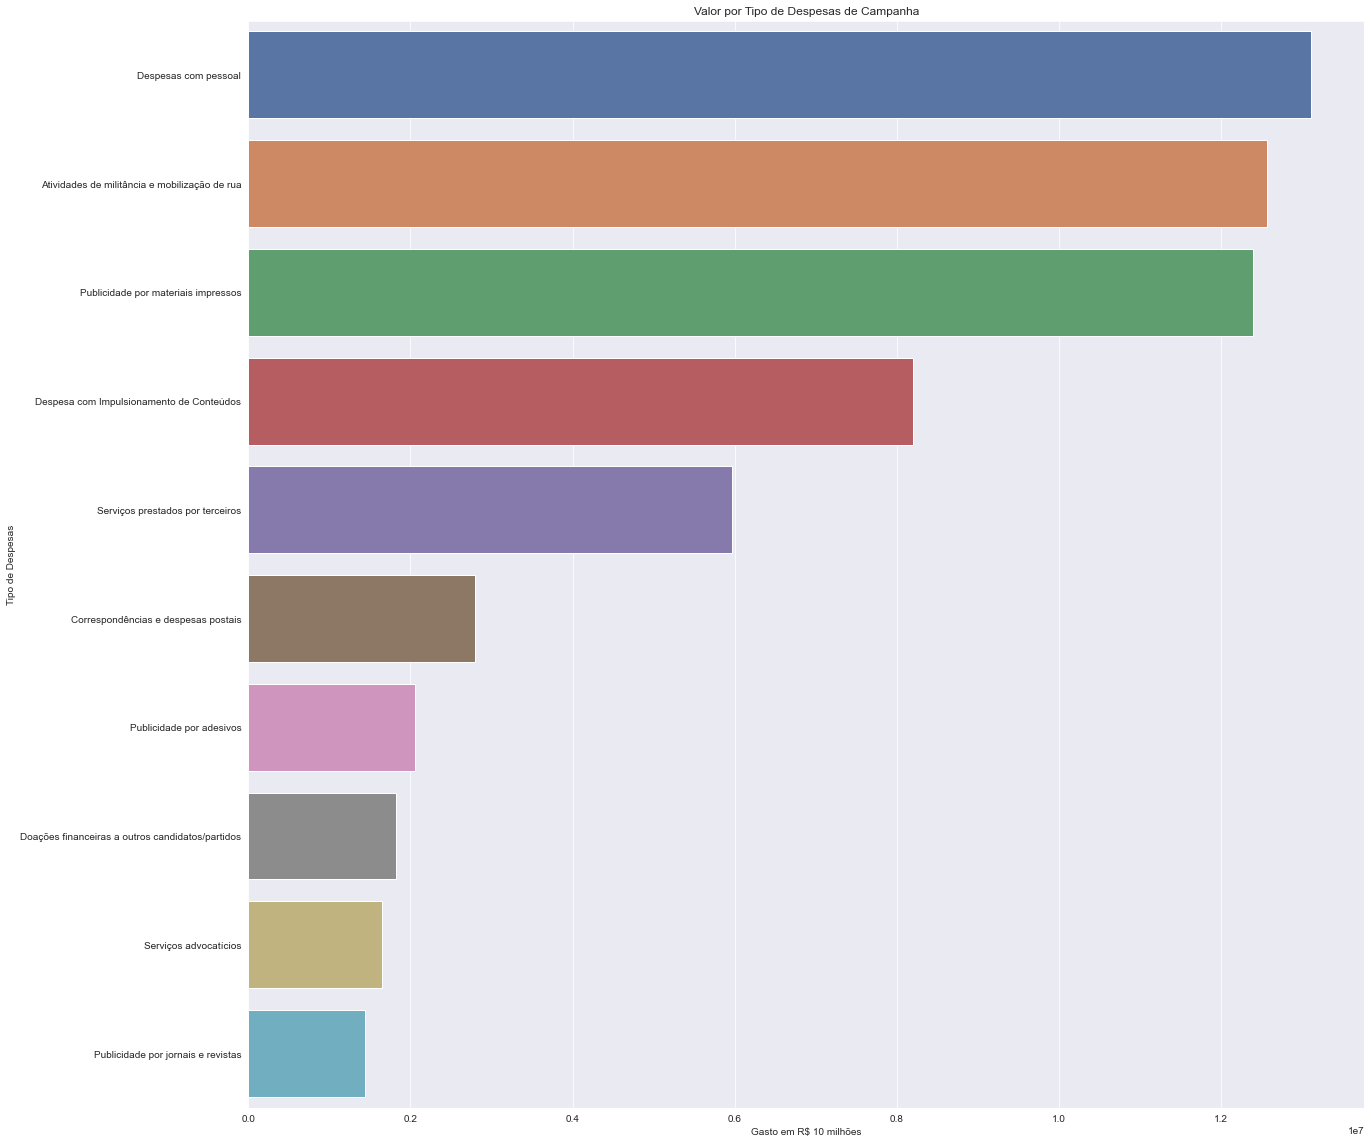

In [17]:
plt.figure(figsize=(20,20))
ax = sns.barplot(data=contratadas.head(10),y='DS_ORIGEM_DESPESA',x='VR_DESPESA_CONTRATADA',)
plt.title('Valor por Tipo de Despesas de Campanha')
plt.xlabel('Gasto em R$ 10 milhões')
plt.ylabel('Tipo de Despesas')
ax

Resultado: Os 10 maiores tipos de gastos de campanha representam 87% dos gastos totais, tendo entre eles o destaque de gastos com pessoal, gastos com militância, gastos com material impresso e gastos com impulsionamento de redes o que chega a 64,9% dos gastos totais.

#### Verificando os partidos e seus gastos

In [18]:
#Separando partidos e gastos
partidos = dados[['SG_PARTIDO','VR_DESPESA_CONTRATADA']]
partidos.head()

,SG_PARTIDO,VR_DESPESA_CONTRATADA
0,PTB,75000.00
1,PT,10.45
2,DEM,10.45
3,DEM,10.45
4,PROS,49.00


In [19]:
#Contando o valor de gasto por partido
sigla = partidos['SG_PARTIDO'].value_counts()
sigla = sigla.reset_index()
sigla.head()

,index,SG_PARTIDO
0,DEM,8811
1,PT,5537
2,PSDB,3808
3,PSD,2760
4,NOVO,2440


#### Gráfico de barras de Número de Candidatos por Partido

<AxesSubplot:title={'center':'Quantidade de Candidatos por Partido'}, xlabel='Quantidade de Candidatos', ylabel='Partido'>

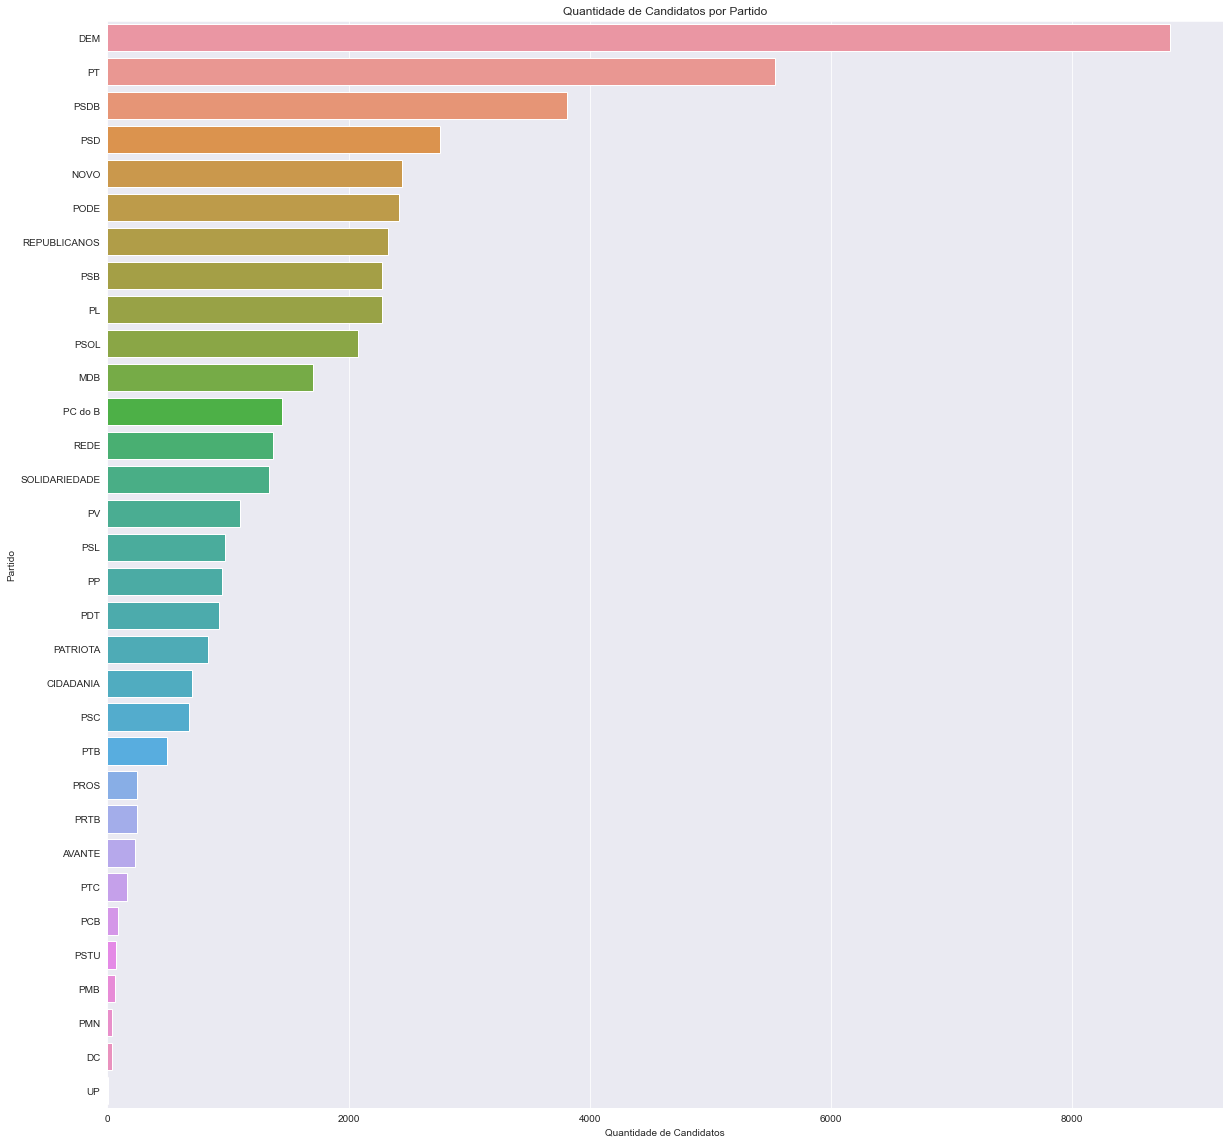

In [20]:
plt.figure(figsize=(20,20))
ax = sns.barplot(data=sigla,y='index',x='SG_PARTIDO')
plt.title('Quantidade de Candidatos por Partido')
plt.xlabel('Quantidade de Candidatos')
plt.ylabel('Partido')
ax

Resultado: Os partidos com mais candidatos são o DEM, o PT e o PSDB o que da cerca de 43% de todos os candidatos a vereador paulistanos.

#### Descobrindo valor gasto por partido

In [21]:
#Somando os valores de gastos por partido (agrupamento)
gasto_pd = partidos.groupby('SG_PARTIDO').sum()

#Filtrando os valores por ordem decrescente de gasto total
gasto_pd = gasto_pd.sort_values(by='VR_DESPESA_CONTRATADA', ascending=False)
gasto_pd = gasto_pd.reset_index()

#### Gráfico de Barras do Gasto de Campanha Total por Partido

<AxesSubplot:title={'center':'Gasto de Campanha Total por Partido'}, xlabel='Gasto em R$ 10 milhões', ylabel='Partidos'>

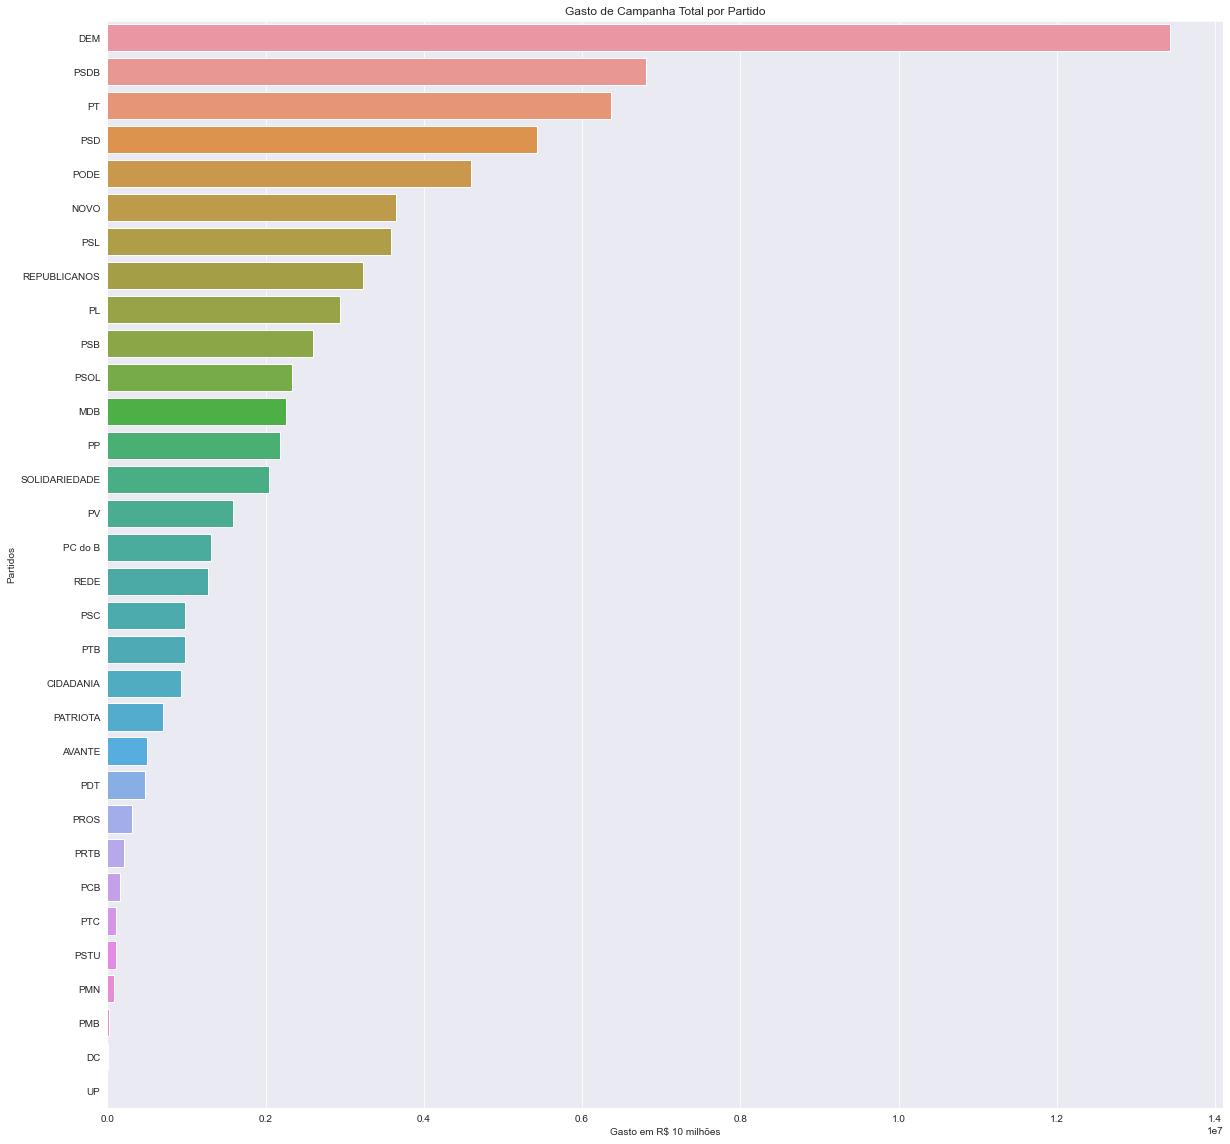

In [22]:
plt.figure(figsize=(20,20))
ax = sns.barplot(data=gasto_pd,y='SG_PARTIDO',x='VR_DESPESA_CONTRATADA',)
plt.title('Gasto de Campanha Total por Partido')
plt.xlabel('Gasto em R$ 10 milhões')
plt.ylabel('Partidos')
ax

Resultado: O DEM, o PT e o PSDB ficaram novamente devido a seu alto número de candidatos 

#### Descobrindo valor gasto por candidato por partido

In [23]:
#Adicionando a coluna de valor de despesa ao número de candidatos por partido
sigla['VR_DESPESA_CONTRATADA'] = gasto_pd['VR_DESPESA_CONTRATADA']
sigla.head()

,index,SG_PARTIDO,VR_DESPESA_CONTRATADA
0,DEM,8811,1.343181e+07
1,PT,5537,6.809738e+06
2,PSDB,3808,6.361903e+06
3,PSD,2760,5.433114e+06
4,NOVO,2440,4.589629e+06


In [24]:
#Criando a coluna de razão entre valor gasto por partido e número de candidatos
sigla['razao'] = sigla['VR_DESPESA_CONTRATADA']/sigla['SG_PARTIDO']
sigla.head()

,index,SG_PARTIDO,VR_DESPESA_CONTRATADA,razao
0,DEM,8811,1.343181e+07,1524.436021
1,PT,5537,6.809738e+06,1229.860527
2,PSDB,3808,6.361903e+06,1670.667881
3,PSD,2760,5.433114e+06,1968.519533
4,NOVO,2440,4.589629e+06,1880.995615


In [25]:
#Orgizando a ordem
sigla = sigla.sort_values(by='razao', ascending=False)
sigla = sigla.reset_index()
sigla.head()

,level_0,index,SG_PARTIDO,VR_DESPESA_CONTRATADA,razao
0,3,PSD,2760,5433113.91,1968.519533
1,22,PROS,246,471020.36,1914.716911
2,4,NOVO,2440,4589629.30,1880.995615
3,2,PSDB,3808,6361903.29,1670.667881
4,12,REDE,1372,2179699.53,1588.702281


#### Gráfico de Barras do Gasto de Campanha por Candidato por Partido

<AxesSubplot:title={'center':'Gasto de Campanha Total por Candidato por Partido'}, xlabel='Gasto em R$ 10 milhões', ylabel='Partidos'>

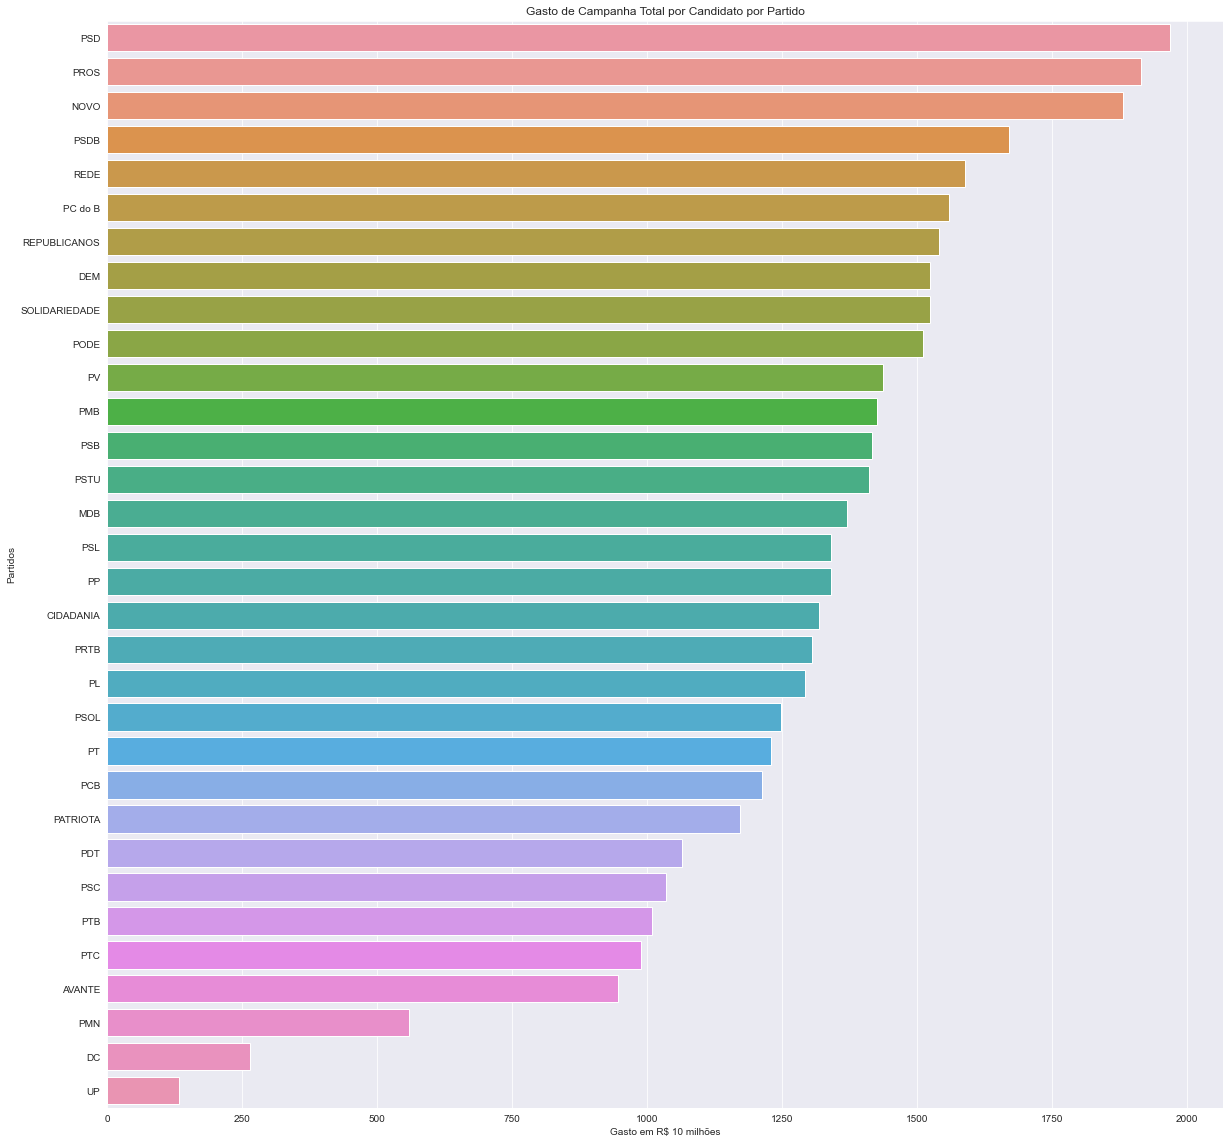

In [26]:
plt.figure(figsize=(20,20))
ax = sns.barplot(data=sigla,y='index',x='razao',)
plt.title('Gasto de Campanha Total por Candidato por Partido')
plt.xlabel('Gasto em R$ 10 milhões')
plt.ylabel('Partidos')
ax

Resultado: Os partidos com maior gasto por partido  são o PSD, o PROS, o NOVO e o PSDB (que se mantém no pódio). É interessante notar que a mudança do DEM e do PT para baixo na ordem de partidos demonstra a grande desigualdade de gastos entre o candidatos.

### Criando o dataframe para regressão

In [27]:
#Verificando a tabela
dados.head()

,NM_CANDIDATO,SG_PARTIDO,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
0,ADRIANO DA COSTA E SILVA,PTB,Diversas a especificar,75000.00
1,PATRICIA RODRIGUES DA SILVA,PT,"Encargos financeiros, taxas bancárias e/ou op....",10.45
2,ANDREA CRISTINA RIBEIRO DOS SANTOS,DEM,"Encargos financeiros, taxas bancárias e/ou op....",10.45
3,SANDRO PINTO DE TOLEDO,DEM,"Encargos financeiros, taxas bancárias e/ou op....",10.45
4,ROGÉRIO GUEIROS DE ARAÚJO,PROS,"Encargos financeiros, taxas bancárias e/ou op....",49.00


In [28]:
#Verificando a tabela 2
contratadas.head(4)

,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
0,Despesas com pessoal,13107947.18
1,Atividades de militância e mobilização de rua,12564630.52
2,Publicidade por materiais impressos,12392619.89
3,Despesa com Impulsionamento de Conteúdos,8193353.55


#### Vamos criar um dataframe com:
<br>
1- Nome do Candidato
<br>
2- Partido
<br>
3- Total de gasto na campanha
<br>
4- Gastos com Despesas com pessoal
<br>
5- Gastos com Atividades de Militância
<br>
6- Gastos com material impresso
<br>
7- Gastos com Impulsionamento
<br>
8- Gastos Outros

In [29]:
#Separando as primeiras 2 colunas
parte= dados[['NM_CANDIDATO','VR_DESPESA_CONTRATADA']]
parte.head()

,NM_CANDIDATO,VR_DESPESA_CONTRATADA
0,ADRIANO DA COSTA E SILVA,75000.00
1,PATRICIA RODRIGUES DA SILVA,10.45
2,ANDREA CRISTINA RIBEIRO DOS SANTOS,10.45
3,SANDRO PINTO DE TOLEDO,10.45
4,ROGÉRIO GUEIROS DE ARAÚJO,49.00


#### Criando colunas 1 e 2

In [30]:
#Selecionando as primeiras 2 colunas
parte1 = dados[['NM_CANDIDATO','SG_PARTIDO']]

#Agrupando candidatos pelo primeiro partido  de cada nome (partido é sempre o mesmo)
parte1 =  parte1.groupby('NM_CANDIDATO').first()

#Verificando
parte1.head()

,SG_PARTIDO
NM_CANDIDATO,
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE
ADAIL LEITE DA SILVA,PL
ADEILTON DE ALMEIDA PEDRO,MDB
ADELSON ROSENBERG COELHO,PSDB
ADEMILSON GALDINO DA SILVA,PC do B


#### Criando coluna 3

In [31]:
#Somando os gastos por candidato
parte2 = parte.groupby('NM_CANDIDATO').sum()

#Verificando
parte2.head()

,VR_DESPESA_CONTRATADA
NM_CANDIDATO,
ABRAO FERREIRA DOS SANTOS,6600.0
ADAIL LEITE DA SILVA,9935.5
ADEILTON DE ALMEIDA PEDRO,9987.9
ADELSON ROSENBERG COELHO,3000.0
ADEMILSON GALDINO DA SILVA,980.0


In [32]:
#Adicionando a coluna de despesas no dataframe
parte1 = pd.concat([parte1, parte2['VR_DESPESA_CONTRATADA']],axis=1)
parte1.head()

,SG_PARTIDO,VR_DESPESA_CONTRATADA
NM_CANDIDATO,,
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,6600.0
ADAIL LEITE DA SILVA,PL,9935.5
ADEILTON DE ALMEIDA PEDRO,MDB,9987.9
ADELSON ROSENBERG COELHO,PSDB,3000.0
ADEMILSON GALDINO DA SILVA,PC do B,980.0


#### Criando a coluna 4

In [33]:
#Criando dataframe com as colunas para filtrar por tipo de despesa
parte3 =dados[['NM_CANDIDATO','DS_ORIGEM_DESPESA','VR_DESPESA_CONTRATADA']]

In [34]:
#Filtrando origem de despesa por despesas com pessoal
parte3 = parte3[parte3['DS_ORIGEM_DESPESA'] == 'Despesas com pessoal']

In [35]:
#Somando os gastos com pessoal
parte3 = parte3.groupby('NM_CANDIDATO').sum()
parte3 = parte3.rename(columns={'VR_DESPESA_CONTRATADA':'DESPESA_COM_PESSOAL'})
parte3.head()

,DESPESA_COM_PESSOAL
NM_CANDIDATO,
ADAIL LEITE DA SILVA,9120.0
ADEMILSON GALDINO DA SILVA,980.0
ADEMILSON RAMOS DA SILVA,6840.0
ADEMIR DO VALE CONCEIÇÃO,3700.0
ADENAILTON VIEIRA DA SILVA,2856.0


In [36]:
#Juntando a coluna de gastos de pessoal com o dataframe
parte1 = pd.concat([parte1, parte3['DESPESA_COM_PESSOAL']],axis=1)
parte1.head()

,SG_PARTIDO,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,6600.0,NaN
ADAIL LEITE DA SILVA,PL,9935.5,9120.0
ADEILTON DE ALMEIDA PEDRO,MDB,9987.9,NaN
ADELSON ROSENBERG COELHO,PSDB,3000.0,NaN
ADEMILSON GALDINO DA SILVA,PC do B,980.0,980.0


#### Criando as outras colunas

In [37]:
#Criando dataframe com as colunas para filtrar por tipo de despesa
parte4 = dados[['NM_CANDIDATO','DS_ORIGEM_DESPESA','VR_DESPESA_CONTRATADA']]

#Filtrando origem de despesa
parte5 = parte4[parte4['DS_ORIGEM_DESPESA'] == 'Atividades de militância e mobilização de rua']

#Somando os gastos com pessoal
parte5 = parte5.groupby('NM_CANDIDATO').sum()

#Renomeando a coluna
parte5 = parte5.rename(columns={'VR_DESPESA_CONTRATADA':'DESPESA_COM_MILITANCIA'})

#Juntando a coluna de gastos ao dataframe
parte1 = pd.concat([parte1, parte5['DESPESA_COM_MILITANCIA']],axis=1)
parte1.head()

,SG_PARTIDO,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL,DESPESA_COM_MILITANCIA
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,6600.0,NaN,5232.5
ADAIL LEITE DA SILVA,PL,9935.5,9120.0,NaN
ADEILTON DE ALMEIDA PEDRO,MDB,9987.9,NaN,9950.0
ADELSON ROSENBERG COELHO,PSDB,3000.0,NaN,NaN
ADEMILSON GALDINO DA SILVA,PC do B,980.0,980.0,NaN


In [38]:
#Repetindo o processo
parte5 = parte4[parte4['DS_ORIGEM_DESPESA'] == 'Publicidade por materiais impressos']
parte5 = parte5.groupby('NM_CANDIDATO').sum()
parte5 = parte5.rename(columns={'VR_DESPESA_CONTRATADA':'DESPESA_COM_IMPRESSO'})
parte1 = pd.concat([parte1, parte5['DESPESA_COM_IMPRESSO']],axis=1)
parte5.head()

,DESPESA_COM_IMPRESSO
NM_CANDIDATO,
ADELSON ROSENBERG COELHO,902.00
ADEMILSON RAMOS DA SILVA,2690.00
ADEMIR DO VALE CONCEIÇÃO,700.00
ADENAILTON VIEIRA DA SILVA,144.00
ADILSON ARMANDO CARVALHO AMADEU,186484.74


In [39]:
#Repetindo o processo
parte6 = parte4[parte4['DS_ORIGEM_DESPESA'] == 'Despesa com Impulsionamento de Conteúdos']
parte6 = parte6.groupby('NM_CANDIDATO').sum()
parte6 = parte6.rename(columns={'VR_DESPESA_CONTRATADA':'DESPESA_COM_IMPULSIONAMENTO'})
parte1 = pd.concat([parte1, parte6['DESPESA_COM_IMPULSIONAMENTO']],axis=1)
parte6.head()

,DESPESA_COM_IMPULSIONAMENTO
NM_CANDIDATO,
ADILSON ARMANDO CARVALHO AMADEU,500.0
ADILSON DE MEDEIROS PAULINO,7000.0
ADRIA GIACCHERI,2000.0
ADRIANA GLEDYS ZINK,1200.0
ADRIANA PIERIN,8840.0


In [40]:
# Prenchendo os valores NA com 0
parte1 = parte1.fillna(0)
parte1.head(5)

,SG_PARTIDO,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL,DESPESA_COM_MILITANCIA,DESPESA_COM_IMPRESSO,DESPESA_COM_IMPULSIONAMENTO
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,6600.0,0.0,5232.5,0.0,0.0
ADAIL LEITE DA SILVA,PL,9935.5,9120.0,0.0,0.0,0.0
ADEILTON DE ALMEIDA PEDRO,MDB,9987.9,0.0,9950.0,0.0,0.0
ADELSON ROSENBERG COELHO,PSDB,3000.0,0.0,0.0,902.0,0.0
ADEMILSON GALDINO DA SILVA,PC do B,980.0,980.0,0.0,0.0,0.0


In [41]:
#Criando colunas de outros somando as selecionadas menos a de gasto total
DESPESA_OUTROS = (((parte1['DESPESA_COM_PESSOAL'] + parte1['DESPESA_COM_MILITANCIA'] + parte1['DESPESA_COM_IMPRESSO'] + parte1['DESPESA_COM_IMPULSIONAMENTO']) - parte1['VR_DESPESA_CONTRATADA']) * -1 )
DESPESA_OUTROS = pd.DataFrame(DESPESA_OUTROS)
DESPESA_OUTROS.head()

,0
ABRAO FERREIRA DOS SANTOS,1367.5
ADAIL LEITE DA SILVA,815.5
ADEILTON DE ALMEIDA PEDRO,37.9
ADELSON ROSENBERG COELHO,2098.0
ADEMILSON GALDINO DA SILVA,-0.0


In [42]:
#Renomeando a coluna
DESPESA_OUTROS = DESPESA_OUTROS.rename(columns={0:'DESPESA_OUTROS'})

#Juntando a coluna de outros ao dataframe
parte1 = pd.concat([parte1, DESPESA_OUTROS['DESPESA_OUTROS']],axis=1)

#Verificando
parte1.head()

,SG_PARTIDO,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL,DESPESA_COM_MILITANCIA,DESPESA_COM_IMPRESSO,DESPESA_COM_IMPULSIONAMENTO,DESPESA_OUTROS
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,6600.0,0.0,5232.5,0.0,0.0,1367.5
ADAIL LEITE DA SILVA,PL,9935.5,9120.0,0.0,0.0,0.0,815.5
ADEILTON DE ALMEIDA PEDRO,MDB,9987.9,0.0,9950.0,0.0,0.0,37.9
ADELSON ROSENBERG COELHO,PSDB,3000.0,0.0,0.0,902.0,0.0,2098.0
ADEMILSON GALDINO DA SILVA,PC do B,980.0,980.0,0.0,0.0,0.0,-0.0


# Etapa 2 - Conhecendo os dados de votos
<hr style='border: 2px solid black;'>

In [43]:
#Subindo a tabela de votação
votos = pd.read_csv('votacao_candidato_munzona_2020_SP.csv', delimiter = ';')

#Verificando
votos.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,27/01/2021,12:08:11,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,2.500000e+11,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,48
1,27/01/2021,12:08:11,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,2.500000e+11,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,47
2,27/01/2021,12:08:11,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,77,SOLIDARIEDADE,Solidariedade,2.500000e+11,PARTIDO ISOLADO,SOLIDARIEDADE,4,NÃO ELEITO,N,338
3,27/01/2021,12:08:11,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,77,SOLIDARIEDADE,Solidariedade,2.500000e+11,PARTIDO ISOLADO,SOLIDARIEDADE,4,NÃO ELEITO,N,24
4,27/01/2021,12:08:11,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,77,SOLIDARIEDADE,Solidariedade,2.500000e+11,PARTIDO ISOLADO,SOLIDARIEDADE,4,NÃO ELEITO,N,37


In [44]:
#Observando os tipos de dados
votos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237809 entries, 0 to 237808
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DT_GERACAO                237809 non-null  object 
 1   HH_GERACAO                237809 non-null  object 
 2   ANO_ELEICAO               237809 non-null  int64  
 3   CD_TIPO_ELEICAO           237809 non-null  int64  
 4   NM_TIPO_ELEICAO           237809 non-null  object 
 5   NR_TURNO                  237809 non-null  int64  
 6   CD_ELEICAO                237809 non-null  int64  
 7   DS_ELEICAO                237809 non-null  object 
 8   DT_ELEICAO                237809 non-null  object 
 9   TP_ABRANGENCIA            237809 non-null  object 
 10  SG_UF                     237809 non-null  object 
 11  SG_UE                     237809 non-null  int64  
 12  NM_UE                     237809 non-null  object 
 13  CD_MUNICIPIO              237809 non-null  i

### Filtrando as colunas de interesse
NM_UE: Nome do Município
<br>
DS_CARGO: Descrição do Cargo
<br>
NM_CANDIDATO: Nome do Candidato
<br>
SG_PARTIDO: Sigla do Partido
<br>
DS_SIT_TOT_TURNO: Situação do Turno
<br>
QT_VOTOS_NOMINAIS: Número de votos

In [45]:
#Filtrando as colunas desejadas
votos = votos[['NM_UE','DS_CARGO','NM_CANDIDATO','SG_PARTIDO','DS_SIT_TOT_TURNO','QT_VOTOS_NOMINAIS']]
votos.head()

,NM_UE,DS_CARGO,NM_CANDIDATO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
0,MONTE MOR,Vereador,DEYANNE CHRISTINY OLIVEIRA MENESES,MDB,SUPLENTE,48
1,MONTE MOR,Vereador,LAERCIO DOS SANTOS SILVA,MDB,SUPLENTE,47
2,MARÍLIA,Vereador,RENATO TAROCO,SOLIDARIEDADE,NÃO ELEITO,338
3,MARÍLIA,Vereador,FRANCIELLE LUZIA DE SOUZA DURAN,SOLIDARIEDADE,NÃO ELEITO,24
4,MARÍLIA,Vereador,MARCIA MARQUES ANDRE,SOLIDARIEDADE,NÃO ELEITO,37


### Filtrando por São Paulo e Vereador

In [46]:
#Filtrando por municipio e cargo
votos = votos[(votos.NM_UE =='SÃO PAULO') & (votos.DS_CARGO =='Vereador')]

#Resetando o index
votos = votos.reset_index()

#Excluindo as colunas indesejadas
votos = votos.drop(['index','NM_UE','DS_CARGO'],axis=1)
votos.head()

,NM_CANDIDATO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
0,GISELE DE MORAES PONTES,DC,NÃO ELEITO,5
1,JORGE ROBSON PEREIRA TAVARES,DC,NÃO ELEITO,0
2,MARISTELA MACHADO LEITE GOMES,DC,NÃO ELEITO,0
3,PAULO PURKYT,DC,NÃO ELEITO,8
4,HAILTON ANJOS DOS SANTOS FILHO,DC,NÃO ELEITO,0


### Somando votos por zona

In [47]:
#Selecionando nome de candidato e partido
votos1 = votos[['NM_CANDIDATO','SG_PARTIDO']]

#Agrupando candidato por partido (sempre o mesmo partido)
votos1 =  votos1.groupby('NM_CANDIDATO').first()
votos1.head()

,SG_PARTIDO
NM_CANDIDATO,
ABEL COSTA,PTC
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE
ADAIL LEITE DA SILVA,PL
ADAO DIVINO DO NASCIMENTO,REPUBLICANOS
ADEILTON DE ALMEIDA PEDRO,MDB


In [48]:
#Selecionando nome de candidato e situação
votos2 = votos[['NM_CANDIDATO','DS_SIT_TOT_TURNO']]

#Agrupando candidato por situação
votos2 = votos2.groupby('NM_CANDIDATO').first()
votos2.head()

,DS_SIT_TOT_TURNO
NM_CANDIDATO,
ABEL COSTA,NÃO ELEITO
ABRAO FERREIRA DOS SANTOS,SUPLENTE
ADAIL LEITE DA SILVA,SUPLENTE
ADAO DIVINO DO NASCIMENTO,SUPLENTE
ADEILTON DE ALMEIDA PEDRO,SUPLENTE


In [49]:
#Selecionando candidatos e votos
votos3 = votos[['NM_CANDIDATO','QT_VOTOS_NOMINAIS']]

#Agrupando candidatos por total de votos
votos3 = votos3.groupby('NM_CANDIDATO').sum()
votos3.head()

,QT_VOTOS_NOMINAIS
NM_CANDIDATO,
ABEL COSTA,169
ABRAO FERREIRA DOS SANTOS,730
ADAIL LEITE DA SILVA,403
ADAO DIVINO DO NASCIMENTO,406
ADEILTON DE ALMEIDA PEDRO,389


In [50]:
#Unindo os dados
votos1 = pd.concat([votos1, votos2['DS_SIT_TOT_TURNO']],axis=1)
votos1 = pd.concat([votos1, votos3['QT_VOTOS_NOMINAIS']],axis=1)
votos1.head()

,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
NM_CANDIDATO,,,
ABEL COSTA,PTC,NÃO ELEITO,169
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,SUPLENTE,730
ADAIL LEITE DA SILVA,PL,SUPLENTE,403
ADAO DIVINO DO NASCIMENTO,REPUBLICANOS,SUPLENTE,406
ADEILTON DE ALMEIDA PEDRO,MDB,SUPLENTE,389


### Gráfico de Distribuição de Votos

C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Votos Totais', ylabel='Densidade'>

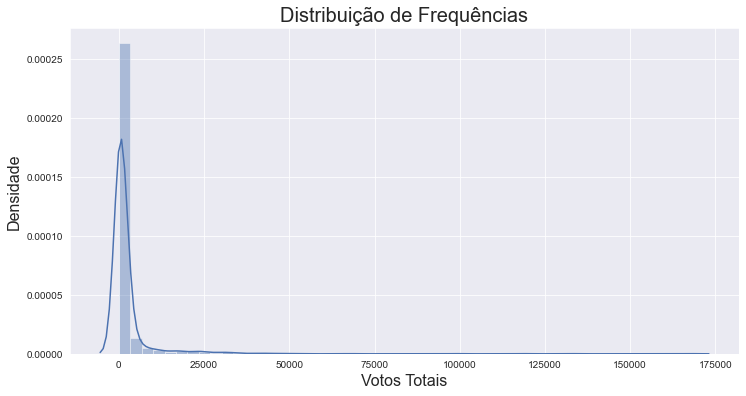

In [51]:
ax = sns.distplot(votos1['QT_VOTOS_NOMINAIS'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Votos Totais', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax

Resultado: Os votos são distribuidos de forma altamente assimétrica à direita, tendo 75% dos candidatos com menos de 1215 votos, enquanto os candidatos mais bem votados como o ver. Eduardo Suplicy (PT) com sua votação de 167.552 votos.

# Parte 3 - Juntando Votos e Gastos
<hr style='border: 2px solid black;'>

In [52]:
#Unindo as colunas
votos1 = pd.concat([votos1, parte1['VR_DESPESA_CONTRATADA']],axis=1)
votos1.head()

,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA
ABEL COSTA,PTC,NÃO ELEITO,169.0,NaN
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,SUPLENTE,730.0,6600.0
ADAIL LEITE DA SILVA,PL,SUPLENTE,403.0,9935.5
ADAO DIVINO DO NASCIMENTO,REPUBLICANOS,SUPLENTE,406.0,NaN
ADEILTON DE ALMEIDA PEDRO,MDB,SUPLENTE,389.0,9987.9


In [53]:
#Unindo as outras colunas
votos1 = pd.concat([votos1, parte1['DESPESA_COM_PESSOAL']],axis=1)
votos1 = pd.concat([votos1, parte1['DESPESA_COM_MILITANCIA']],axis=1)
votos1 = pd.concat([votos1, parte1['DESPESA_COM_IMPRESSO']],axis=1)
votos1 = pd.concat([votos1, parte1['DESPESA_COM_IMPULSIONAMENTO']],axis=1)
votos1 = pd.concat([votos1, parte1['DESPESA_OUTROS']],axis=1)
votos1 = votos1.fillna(0)
votos1.head()

,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL,DESPESA_COM_MILITANCIA,DESPESA_COM_IMPRESSO,DESPESA_COM_IMPULSIONAMENTO,DESPESA_OUTROS
ABEL COSTA,PTC,NÃO ELEITO,169.0,0.0,0.0,0.0,0.0,0.0,0.0
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,SUPLENTE,730.0,6600.0,0.0,5232.5,0.0,0.0,1367.5
ADAIL LEITE DA SILVA,PL,SUPLENTE,403.0,9935.5,9120.0,0.0,0.0,0.0,815.5
ADAO DIVINO DO NASCIMENTO,REPUBLICANOS,SUPLENTE,406.0,0.0,0.0,0.0,0.0,0.0,0.0
ADEILTON DE ALMEIDA PEDRO,MDB,SUPLENTE,389.0,9987.9,0.0,9950.0,0.0,0.0,37.9


#### Criando varíavel de eleito

In [54]:
#Criando variáveis dummies para resultado eleitoral (eleito, suplente, não eleito)
eleito = pd.get_dummies(votos1['DS_SIT_TOT_TURNO'])
eleito['ELEITO'] = (eleito['ELEITO POR MÉDIA'] + eleito['ELEITO POR QP'])
eleito.head()

,0,ELEITO POR MÉDIA,ELEITO POR QP,NÃO ELEITO,SUPLENTE,ELEITO
ABEL COSTA,0,0,0,1,0,0
ABRAO FERREIRA DOS SANTOS,0,0,0,0,1,0
ADAIL LEITE DA SILVA,0,0,0,0,1,0
ADAO DIVINO DO NASCIMENTO,0,0,0,0,1,0
ADEILTON DE ALMEIDA PEDRO,0,0,0,0,1,0


In [55]:
#Adicionando a coluna Eleito( se verdadeiro = 1, se falso = 0)
votos1 = pd.concat([votos1, eleito['ELEITO']],axis=1)
votos1 = votos1.drop(['DS_SIT_TOT_TURNO'], axis=1)
votos1.head()

,SG_PARTIDO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL,DESPESA_COM_MILITANCIA,DESPESA_COM_IMPRESSO,DESPESA_COM_IMPULSIONAMENTO,DESPESA_OUTROS,ELEITO
ABEL COSTA,PTC,169.0,0.0,0.0,0.0,0.0,0.0,0.0,0
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,730.0,6600.0,0.0,5232.5,0.0,0.0,1367.5,0
ADAIL LEITE DA SILVA,PL,403.0,9935.5,9120.0,0.0,0.0,0.0,815.5,0
ADAO DIVINO DO NASCIMENTO,REPUBLICANOS,406.0,0.0,0.0,0.0,0.0,0.0,0.0,0
ADEILTON DE ALMEIDA PEDRO,MDB,389.0,9987.9,0.0,9950.0,0.0,0.0,37.9,0


# Parte 4 - Análise dos dados de Gastos e Votos
<hr style='border: 2px solid black;'>

### Verificando o número de candidatos sem prestação de contas

In [56]:
sem_contas = votos1.query('VR_DESPESA_CONTRATADA == 0')

#Número de linhas onde despesa = 0
sem_contas.shape[0]

772

Para evitar erros de análise optei por excluir os candidatos que não fizeram prestação de contas. Embora o número de votos dos candidatos com despesa de campanha = 0 seja alto para os outliers, se enquadrando no número de votos dos candidatos eleitos (entre 13 mil e 160 mil votos) é completamente inviável que esses candidatos tenham tido R$ 0,00 investimento nas campanhas. Dessa forma vamos considerá-los como erros.

In [57]:
#Número de linhas do nosso dataset
votos1.shape[0]

2103

In [58]:
#Número de registros que devemos ficar com
1849 - 772

1077

In [59]:
#Eliminando linhas onde valor de despesa = 0
votos1 = votos1[votos1.VR_DESPESA_CONTRATADA != 0]

In [60]:
votos1.shape[0]

1331

Verificando as distribuições:

In [61]:
votos1.head()

,SG_PARTIDO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL,DESPESA_COM_MILITANCIA,DESPESA_COM_IMPRESSO,DESPESA_COM_IMPULSIONAMENTO,DESPESA_OUTROS,ELEITO
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,730.0,6600.0,0.0,5232.5,0.0,0.0,1367.5,0
ADAIL LEITE DA SILVA,PL,403.0,9935.5,9120.0,0.0,0.0,0.0,815.5,0
ADEILTON DE ALMEIDA PEDRO,MDB,389.0,9987.9,0.0,9950.0,0.0,0.0,37.9,0
ADELSON ROSENBERG COELHO,PSDB,1491.0,3000.0,0.0,0.0,902.0,0.0,2098.0,0
ADEMILSON GALDINO DA SILVA,PC do B,161.0,980.0,980.0,0.0,0.0,0.0,-0.0,0


In [62]:
#Observando o resumo estatístico
votos1.describe()

,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL,DESPESA_COM_MILITANCIA,DESPESA_COM_IMPRESSO,DESPESA_COM_IMPULSIONAMENTO,DESPESA_OUTROS,ELEITO
count,1331.000000,1.331000e+03,1331.000000,1.331000e+03,1331.000000,1331.000000,1.331000e+03,1331.000000
mean,2615.504884,5.349856e+04,9848.194726,9.439993e+03,9310.758745,6155.787791,1.874382e+04,0.034560
std,9241.005050,1.446500e+05,30397.397088,5.408293e+04,31840.910709,20149.768337,7.049178e+04,0.182732
min,0.000000,8.300000e-01,0.000000,0.000000e+00,0.000000,0.000000,-0.000000e+00,0.000000
25%,106.500000,4.635220e+03,0.000000,0.000000e+00,0.000000,0.000000,8.042500e+01,0.000000
50%,416.000000,1.000000e+04,300.000000,0.000000e+00,720.000000,0.000000,2.028000e+03,0.000000
75%,1359.500000,3.596299e+04,7840.000000,4.850000e+02,4422.500000,2501.895000,1.163169e+04,0.000000
max,167552.000000,2.500490e+06,379950.000000,1.640087e+06,526637.510000,213989.630000,1.958988e+06,1.000000


In [63]:
#Verificando o número de candidatos com 0 votos
votos1.QT_VOTOS_NOMINAIS.value_counts()

0.0       254
230.0       6
631.0       4
451.0       4
408.0       4
         ... 
819.0       1
1326.0      1
749.0       1
529.0       1
730.0       1
Name: QT_VOTOS_NOMINAIS, Length: 853, dtype: int64

In [64]:
#Eliminando os candidatos com 0 votos para tentar diminuir o grau de distorção da previsão.
votos1 = votos1[(votos1.QT_VOTOS_NOMINAIS != 0)]

In [65]:
Verificando
votos1.QT_VOTOS_NOMINAIS.value_counts()

230.0     6
408.0     4
245.0     4
123.0     4
207.0     4
         ..
819.0     1
1326.0    1
749.0     1
529.0     1
730.0     1
Name: QT_VOTOS_NOMINAIS, Length: 852, dtype: int64

### Visualizações dos Dados

### Boxplot dos Gastos de Campanha

<AxesSubplot:title={'center':'Gastos de Campanha'}, xlabel='Valor em Milhões de R$'>

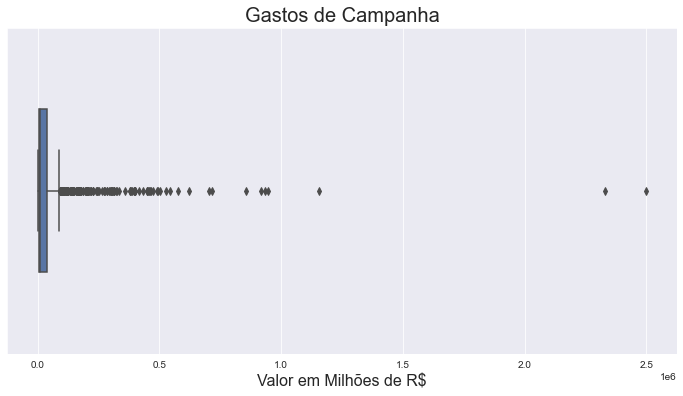

In [66]:
ax = sns.boxplot(x='VR_DESPESA_CONTRATADA', data=votos1, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gastos de Campanha', fontsize=20)
ax.set_xlabel('Valor em Milhões de R$', fontsize=16)
ax

Resultado: 50% dos candidatos gastaram menos de R$1 mil reais em suas campanhas enquanto outros chegaram a investir centenas de milhares a milhões de reais. Entre os vereadores eleitos, o ver. Milton Leite (DEM) gastou 2,4 milhões de reais em sua campanha enquanto a ver. Sonaira Fernandes gastou cerca de R$ 5,9 mil.

### Boxplot dos Gastos em Campanha filtrando por Eleito ou Não

<AxesSubplot:title={'center':'Gastos de Campanha'}, xlabel='Eleito', ylabel='Valor em Milhões de R$'>

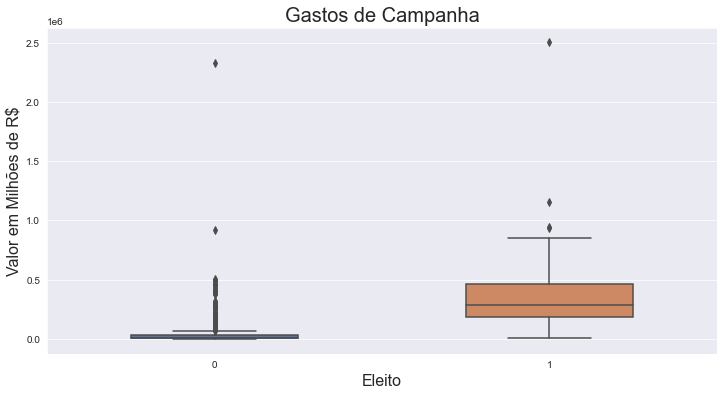

In [67]:
ax = sns.boxplot(y=votos1.VR_DESPESA_CONTRATADA, x='ELEITO', data=votos1, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gastos de Campanha', fontsize=20)
ax.set_ylabel('Valor em Milhões de R$', fontsize=16)
ax.set_xlabel('Eleito', fontsize=16)
ax

Resultado: Os candidatos eleitos gastaram mais em suas campanhas que a maioria dos candidatos não eleitos.

### Boxplot dos Votos

<AxesSubplot:title={'center':'Quantidade de Votos em Vereadores'}, xlabel='Votos'>

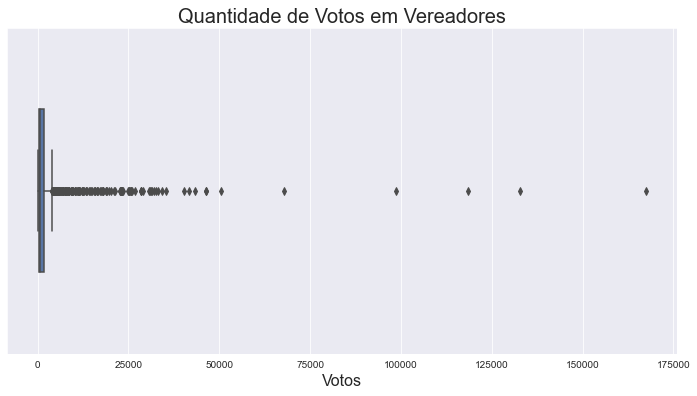

In [68]:
ax = sns.boxplot(x=votos1.QT_VOTOS_NOMINAIS, data=votos1, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Quantidade de Votos em Vereadores', fontsize=20)
ax.set_xlabel('Votos', fontsize=16)
ax

## Verificando relacionamentos e  correlações

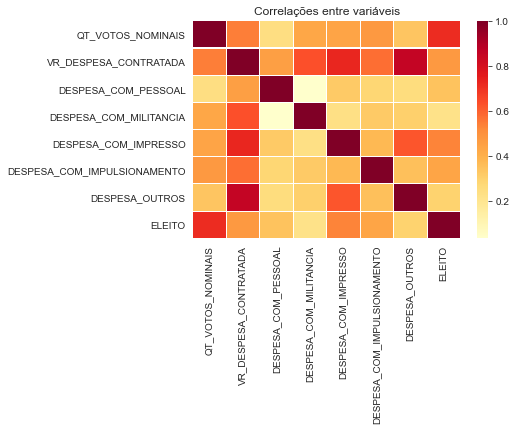

In [69]:
#Plotando gráfico de correlações
corr=votos1.corr()
sns.heatmap(corr,cmap = "YlOrRd",linewidths=0.1)
plt.title('Correlações entre variáveis')
plt.show()

In [70]:
#Verificando os valores das correlações
corr

,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL,DESPESA_COM_MILITANCIA,DESPESA_COM_IMPRESSO,DESPESA_COM_IMPULSIONAMENTO,DESPESA_OUTROS,ELEITO
QT_VOTOS_NOMINAIS,1.000000,0.544502,0.246049,0.432684,0.443339,0.476189,0.337915,0.715833
VR_DESPESA_CONTRATADA,0.544502,1.000000,0.457384,0.636084,0.730467,0.576241,0.853031,0.477267
DESPESA_COM_PESSOAL,0.246049,0.457384,1.000000,0.035260,0.323118,0.282500,0.257251,0.345251
DESPESA_COM_MILITANCIA,0.432684,0.636084,0.035260,1.000000,0.232132,0.324387,0.303081,0.222455
DESPESA_COM_IMPRESSO,0.443339,0.730467,0.323118,0.232132,1.000000,0.374839,0.624977,0.534496
DESPESA_COM_IMPULSIONAMENTO,0.476189,0.576241,0.282500,0.324387,0.374839,1.000000,0.355445,0.440510
DESPESA_OUTROS,0.337915,0.853031,0.257251,0.303081,0.624977,0.355445,1.000000,0.295600
ELEITO,0.715833,0.477267,0.345251,0.222455,0.534496,0.440510,0.295600,1.000000


### Gráfico de Distribuição Votos com Gastos

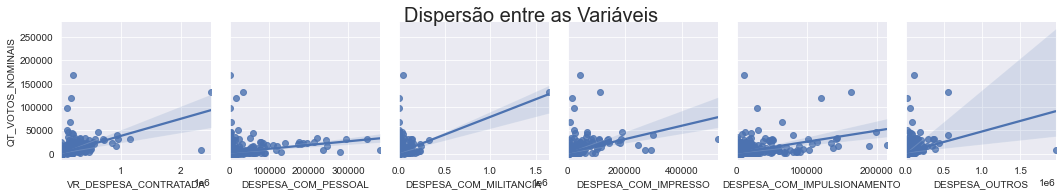

In [71]:
ax = sns.pairplot(votos1, y_vars='QT_VOTOS_NOMINAIS', x_vars=['VR_DESPESA_CONTRATADA', 'DESPESA_COM_PESSOAL', 'DESPESA_COM_MILITANCIA', 'DESPESA_COM_IMPRESSO', 'DESPESA_COM_IMPULSIONAMENTO','DESPESA_OUTROS'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

### Gráfico de Distribuição de Votos com Gastos Totais

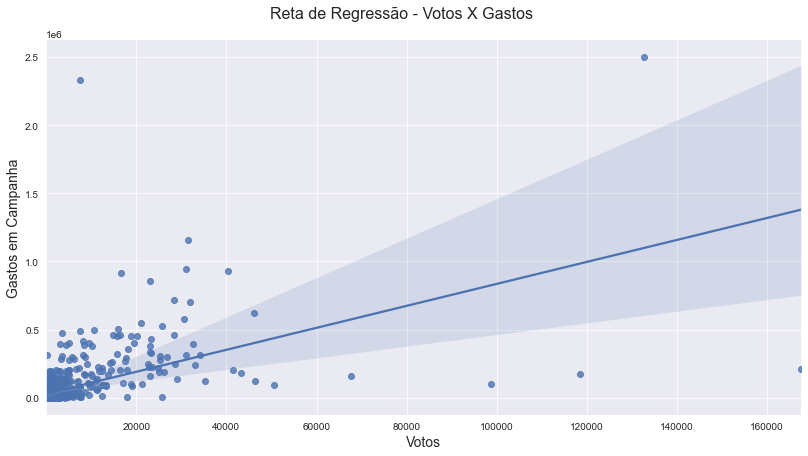

In [108]:
ax = sns.lmplot(x="QT_VOTOS_NOMINAIS", y="VR_DESPESA_CONTRATADA", data=votos1)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Votos X Gastos', fontsize=16, y=1.02)
ax.set_xlabels("Votos", fontsize=14)
ax.set_ylabels("Gastos em Campanha", fontsize=14)
ax

## Normalizando os dados
Para melhores resultados da nossa regressão e para poder verificar melhor a relação entre as variáveis vamos aplicar o logaritmo nelas para que elas tenham uma distribuição próxima a uma normal.

In [73]:
#Criando o dataframe para os valores em logaw
votos_log = []
votos_log = pd.DataFrame(votos_log)

In [74]:
votos1.head(1)

,SG_PARTIDO,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA,DESPESA_COM_PESSOAL,DESPESA_COM_MILITANCIA,DESPESA_COM_IMPRESSO,DESPESA_COM_IMPULSIONAMENTO,DESPESA_OUTROS,ELEITO
ABRAO FERREIRA DOS SANTOS,SOLIDARIEDADE,730.0,6600.0,0.0,5232.5,0.0,0.0,1367.5,0


In [75]:
votos_log['LOG_VOTOS'] = np.log(votos1['QT_VOTOS_NOMINAIS']+2)
votos_log

,LOG_VOTOS
ABRAO FERREIRA DOS SANTOS,6.595781
ADAIL LEITE DA SILVA,6.003887
ADEILTON DE ALMEIDA PEDRO,5.968708
ADELSON ROSENBERG COELHO,7.308543
ADEMILSON GALDINO DA SILVA,5.093750
...,...
YAGO MATEUS VELOSO RODRIGUES,6.023448
YURI GAMA COSTA,6.621406
ZENIL MOREIRA DA COSTA FILHO,5.913503
ZENIVAL DO CARMO FERREIRA ALIAGA,7.131699


In [76]:
votos_log['LOG_DESPESA'] = np.log(votos1['VR_DESPESA_CONTRATADA']+2)
votos_log['LOG_PESSOAL'] = np.log(votos1['DESPESA_COM_PESSOAL']+2)
votos_log['LOG_MILITANCIA'] = np.log(votos1['DESPESA_COM_MILITANCIA']+2)
votos_log['LOG_IMPRESSO'] = np.log(votos1['DESPESA_COM_IMPRESSO']+2)
votos_log['LOG_IMPULSIONAMENTO'] = np.log(votos1['DESPESA_COM_IMPULSIONAMENTO']+2)
votos_log['LOG_OUTROS'] = np.log(votos1['DESPESA_OUTROS']+2)
votos_log

,LOG_VOTOS,LOG_DESPESA,LOG_PESSOAL,LOG_MILITANCIA,LOG_IMPRESSO,LOG_IMPULSIONAMENTO,LOG_OUTROS
ABRAO FERREIRA DOS SANTOS,6.595781,8.795128,0.693147,8.563027,0.693147,0.693147,7.222201
ADAIL LEITE DA SILVA,6.003887,9.204071,9.118444,0.693147,0.693147,0.693147,6.706251
ADEILTON DE ALMEIDA PEDRO,5.968708,9.209330,0.693147,9.205529,0.693147,0.693147,3.686376
ADELSON ROSENBERG COELHO,7.308543,8.007034,0.693147,0.693147,6.806829,0.693147,7.649693
ADEMILSON GALDINO DA SILVA,5.093750,6.889591,6.889591,0.693147,0.693147,0.693147,0.693147
...,...,...,...,...,...,...,...
YAGO MATEUS VELOSO RODRIGUES,6.023448,9.210540,9.210540,0.693147,0.693147,0.693147,0.693147
YURI GAMA COSTA,6.621406,8.517593,8.283241,0.693147,0.693147,0.693147,6.953684
ZENIL MOREIRA DA COSTA FILHO,5.913503,9.614950,9.281917,0.693147,0.693147,6.909753,8.085542
ZENIVAL DO CARMO FERREIRA ALIAGA,7.131699,8.289539,0.693147,0.693147,8.289539,0.693147,0.693147


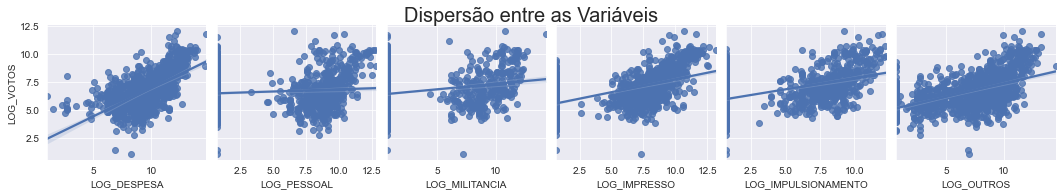

In [77]:
ax = sns.pairplot(votos_log, y_vars='LOG_VOTOS', x_vars=['LOG_DESPESA', 'LOG_PESSOAL', 'LOG_MILITANCIA', 'LOG_IMPRESSO', 'LOG_IMPULSIONAMENTO','LOG_OUTROS'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

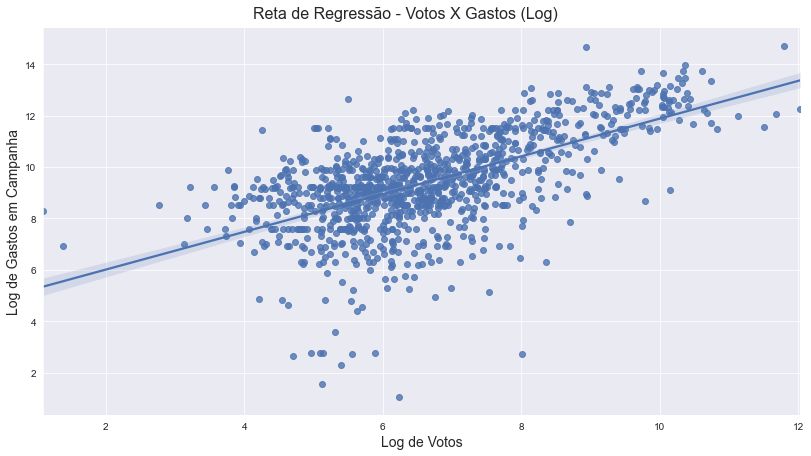

In [110]:
ax = sns.lmplot(x="LOG_VOTOS", y="LOG_DESPESA", data=votos_log)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Votos X Gastos (Log)', fontsize=16, y=1.02)
ax.set_xlabels("Log de Votos", fontsize=14)
ax.set_ylabels("Log de Gastos em Campanha", fontsize=14)
ax

# Parte 5 - Aplicação de Regressão
<hr style='border: 2px solid black;'>

### Parte 5.1 - Regressão Linear

In [78]:
#Importando pacote sklearn
from sklearn.model_selection import train_test_split

In [79]:
#Criando variável para Votos (Variável Y)
y = votos_log['LOG_VOTOS']

In [80]:
#Criando variável para Despesa Total (Variável X)
x = votos_log['LOG_DESPESA']

In [81]:
#Criando os datasets de teste e treino com razão 20%/80%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)

In [82]:
#Importando statsmodels 
import statsmodels.api as sm

In [83]:
#Adicionando constante
x_train_com_constante = sm.add_constant(x_train)

In [84]:
modelo_statsmodels = sm.OLS(y_train, x_train_com_constante, hasconst = True).fit()

### Avaliação do Modelo

In [85]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              LOG_VOTOS   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     511.5
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           3.18e-89
Time:                        21:16:13   Log-Likelihood:                -1394.2
No. Observations:                 861   AIC:                             2792.
Df Residuals:                     859   BIC:                             2802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8828      0.214      8.788      

#### Como P>|t| é menor que 0, podemos considerar que o modelo é aceitável

### Estimando o Modelo com os dados de Treino

In [86]:
#Importando Linear Regression do scikit-learns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [87]:
modelo = LinearRegression()

In [88]:
modelo.fit(x_train_com_constante, y_train)

LinearRegression()

#### Estimando o coeficiente de terminação (R²) dos dados de treino

In [89]:
print('R² = {}'.format(modelo.score(x_train_com_constante, y_train).round(3)))

R² = 0.373


In [90]:
#Prevendo
x_test_com_constante = sm.add_constant(x_test)

y_previsto = modelo.predict(x_test_com_constante)
y_previsto.shape

(216,)

In [91]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.359


In [92]:
modelo.coef_[1]

0.5028262959177827

In [93]:
y_previsto_train = modelo.predict(x_train_com_constante)

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

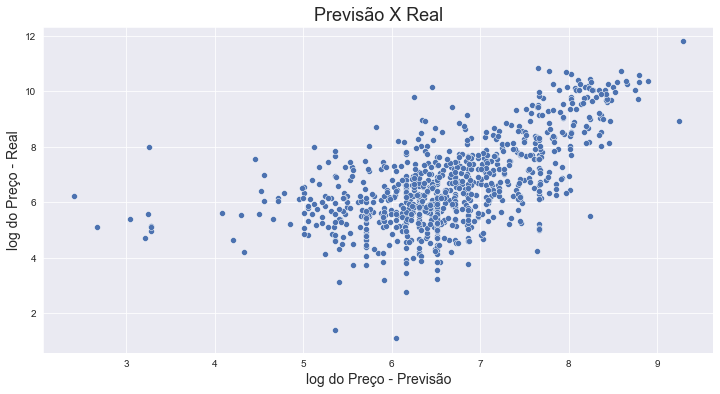

In [94]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

In [95]:
residuo = y_train - y_previsto_train

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

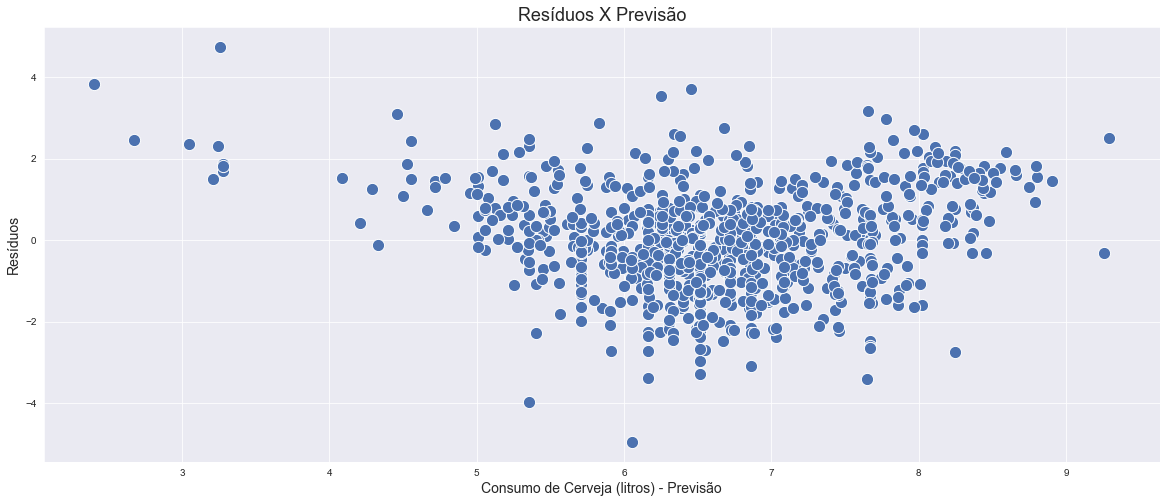

In [96]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### Parte 5.1 - Regressão Linear Múltipla

In [97]:
#Criando nova variável X para Regressão Linear Múltipla
x2 = votos_log[['LOG_PESSOAL', 'LOG_MILITANCIA', 'LOG_IMPRESSO', 'LOG_IMPULSIONAMENTO','LOG_OUTROS']]

In [98]:
#Criando os datasets de teste e treino com razão 20%/80%
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2, random_state=2811)

In [99]:
#Adicionando constante
x2_train_com_constante = sm.add_constant(x2_train)

In [100]:
#Dando fit no modelo
modelo_statsmodels2 = sm.OLS(y2_train, x2_train_com_constante, hasconst = True).fit()

In [101]:
#Estimando o modelo
print(modelo_statsmodels2.summary())

                            OLS Regression Results                            
Dep. Variable:              LOG_VOTOS   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     164.1
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          3.00e-122
Time:                        21:16:16   Log-Likelihood:                -1305.8
No. Observations:                 861   AIC:                             2624.
Df Residuals:                     855   BIC:                             2652.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.5293    

#### Como P>|t| dos a variável de gastos com Militancia é maior que 0.05,  assim vamos retirá-lo do modelo e reestimar

In [102]:
#Criando nova variável X para Regressão Linear Múltipla
x2 = votos_log[['LOG_PESSOAL', 'LOG_IMPRESSO', 'LOG_IMPULSIONAMENTO','LOG_OUTROS']]

#Criando os datasets de teste e treino com razão 20%/80%
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.2, random_state=2811)

#Adicionando constante
x2_train_com_constante = sm.add_constant(x2_train)

#Dando fit no modelo
modelo_statsmodels2 = sm.OLS(y2_train, x2_train_com_constante, hasconst = True).fit()

#Estimando o modelo
print(modelo_statsmodels2.summary())

                            OLS Regression Results                            
Dep. Variable:              LOG_VOTOS   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     203.7
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          1.03e-122
Time:                        21:16:16   Log-Likelihood:                -1307.4
No. Observations:                 861   AIC:                             2625.
Df Residuals:                     856   BIC:                             2649.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.5479    

### Estimando o Modelo com os dados de Treino

In [103]:
#Estimando o R² para o modelo
modelo = LinearRegression()
modelo.fit(x2_train, y2_train)
print('R² = {}'.format(modelo.score(x2_train, y2_train).round(3)))

R² = 0.488


In [104]:
#Estimando o R² para as previsões
y2_previsto = modelo.predict(x2_test)
print('R² = %s' % metrics.r2_score(y2_test, y2_previsto).round(3))

R² = 0.449


### Obtendo os coeficientes de regressão

In [105]:
modelo.coef_

array([0.02454909, 0.14110978, 0.1016088 , 0.11952916])

In [106]:
index = ['Intercepto','LOG Gastos com Pessoal', 'LOG Gastos Material Impresso', 'LOG Gastos Impulsionamento','LOG Gastos Outros']

In [107]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,4.547886
LOG Gastos com Pessoal,0.024549
LOG Gastos Material Impresso,0.141110
LOG Gastos Impulsionamento,0.101609
LOG Gastos Outros,0.119529


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Número de Votos seria de <b> 94 votos </b> (exp[4.547886]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Gastos com Pessoal (Reais)</b> → Mantendo-se o valor das outras variáveis (Gastos com Material Impresso, Impulsionamento e Outros) constante, um acréscimo de 1 R$ no Gastos com Pessoal gera, em média, um acréscimo de <b>0.02</b> no Número de Votos.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b> Gastos com Material Impresso (Reais)</b> → Mantendo-se o valor das outras variáveis constante, um acréscimo de 1 R$ no Gastos com Material Impresso gera, em média, um acréscimo de <b>0.14</b> no Número de Votos.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b> Gastos com Impulsionamento (Reais)</b> → Mantendo-se o valor das outras variáveis constante, um acréscimo de 1 R$ no Gastos com Material Impresso gera, em média, um acréscimo de <b>0.1</b> no Número de Votos.
</p>
    
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b> Gastos com Outros (Reais)</b> → Mantendo-se o valor das outras variáveis constante, um acréscimo de 1 R$ no Gastos com Outros (que engloba outros tipos de gastos com publicidade, contas e diversos outros serviços) gera, em média, um acréscimo de <b>0.11</b> no Número de Votos.
</p>